In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def rk4_adapt_safe(f, t0, tf, N, r0, params = [], delta = 1e-6):
    h = (tf - t0) / N
    i = 0
    ts = np.zeros(10000, float)
    ts[0] = t0
    r = np.zeros((len(r0), 10000), float)
    r[:, 0] = r0
    while ts[i] < tf:
        i += 1
        r0, t = r[:,i - 1], ts[i-1]
        r1_t = r0 + iterate_rk4(f, r0, t, h, params)
        r1 = r1_t + iterate_rk4(f, r1_t, t + h, h, params)
        r2 = r0 + iterate_rk4(f, r0, t, 2 * h, params)
        p = 30 * h * delta / np.linalg.norm((r2 - r1))
        h *= min(p ** (1/4), 2)
        while p < 1:
            r1_t = r0 + iterate_rk4(f, r0, t, h, params)
            r1 = r1_t + iterate_rk4(f, r1_t, t + h, h, params)
            r2 = r0 + iterate_rk4(f, r0, t, 2 * h, params)
            p = 30 * h * delta / np.linalg.norm((r2 - r1))
            h *= min(p ** (1/4), 2)
        r[:,i] = r1
        ts[i] = t + 2 * h
    return ts[:i], r[:, :i]

def iterate_rk4(f, r, t, h, params):
    k1 = h * f(r, t, *params)
    k2 = h * f(r + .5 * k1, t + .5 * h, *params)
    k3 = h * f(r + .5 * k2, t + .5 * h, *params)
    k4 = h * f(r + k3, t + h, *params)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [7]:
def rk4_adapt(f, t0, tf, N, r0, params = [], delta = 1e-6):
    h = (tf - t0) / N
    i = 0
    ts = np.zeros(10000, float)
    ts[0] = t0
    r = np.zeros((len(r0), 10000), float)
    r[:, 0] = r0
    while ts[i] < tf:
        i += 1
        r0, t = r[:,i - 1], ts[i-1]
        r1_t = r0 + iterate_rk4(f, r0, t, h, params)
        r1 = r1_t + iterate_rk4(f, r1_t, t + h, h, params)
        r2 = r0 + iterate_rk4(f, r0, t, 2 * h, params)
        p = 30 * h * delta / np.linalg.norm((r2 - r1))
        h *= min(p ** (1/4), 2)
        if p < 1:
            r1_t = r0 + iterate_rk4(f, r0, t, h, params)
            r1 = r1_t + iterate_rk4(f, r1_t, t + h, h, params)
            r2 = r0 + iterate_rk4(f, r0, t, 2 * h, params)
        r[:,i] = r1
        ts[i] = t + 2 * h
    return ts[:i], r[:, :i]

def iterate_rk4(f, r, t, h, params):
    k1 = h * f(r, t, *params)
    k2 = h * f(r + .5 * k1, t + .5 * h, *params)
    k3 = h * f(r + .5 * k2, t + .5 * h, *params)
    k4 = h * f(r + k3, t + h, *params)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [8]:
def f(r, t):
    return np.array([-r[0] ** 3 + np.sin(t)])

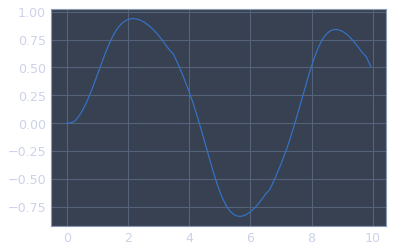

In [9]:
t, r = rk4_adapt(f, 0, 10, 1000, [0], delta = 1e-8)
plt.plot(t, r[0])
plt.show()